<a href="https://colab.research.google.com/github/dineshdb02/Machine-learning-practise/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df=pd.read_csv("/content/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.select_dtypes(include="object")

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current
...,...,...
99995,Female,No Info
99996,Female,No Info
99997,Male,former
99998,Female,never


In [ ]:
di=df.select_dtypes(include=["int64","float64"])

In [ ]:
#finding outliers

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

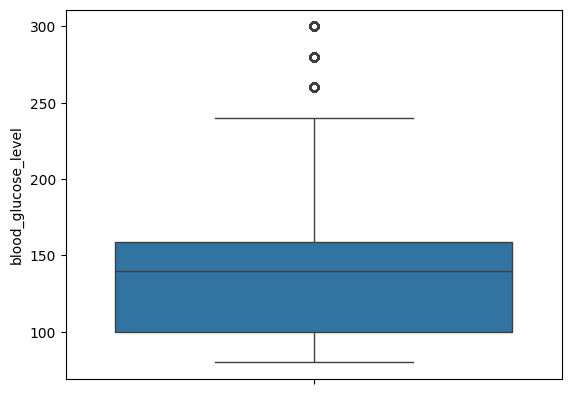

In [ ]:
sns.boxplot(di["blood_glucose_level"])
plt.show()

In [ ]:
z score method

In [ ]:
upper_limit=df["blood_glucose_level"].mean()+3*df["blood_glucose_level"].std()
lower_limit=df["blood_glucose_level"].mean()-3*df["blood_glucose_level"].std()
print(upper_limit)
print(lower_limit)

260.1824681461124
15.93365185388761


In [ ]:
#removing outliers
din=df.loc[(df["blood_glucose_level"]<upper_limit)&(df["blood_glucose_level"]> lower_limit)]
print(len(df)-len(din))
print(len(din))
print(len(df))

1403
98597
100000


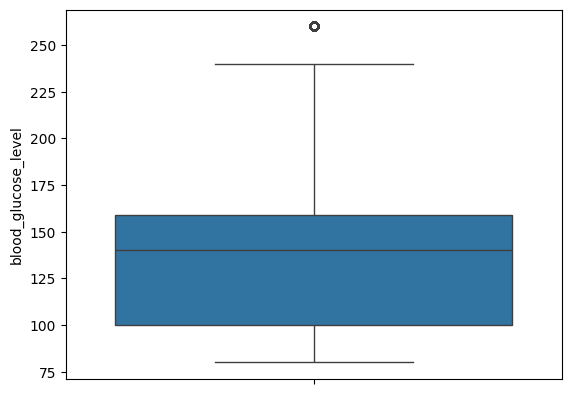

In [ ]:
sns.boxplot(din["blood_glucose_level"])
plt.show()

In [ ]:
len(di)

100000

In [ ]:
#capping method
di=df.copy()
di.loc[di['blood_glucose_level'] > upper_limit, 'blood_glucose_level'] = upper_limit
di.loc[di['blood_glucose_level'] < lower_limit, 'blood_glucose_level'] = lower_limit

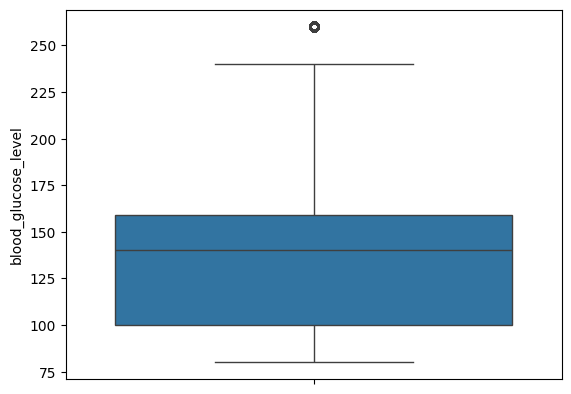

In [ ]:
sns.boxplot(di["blood_glucose_level"])
plt.show()

**IQR METHOD**

In [ ]:
q1=di["blood_glucose_level"].quantile(0.25)
q3=di["blood_glucose_level"].quantile(0.75)
iqr=q3-q1
iqr

59.0

In [ ]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

247.5
11.5


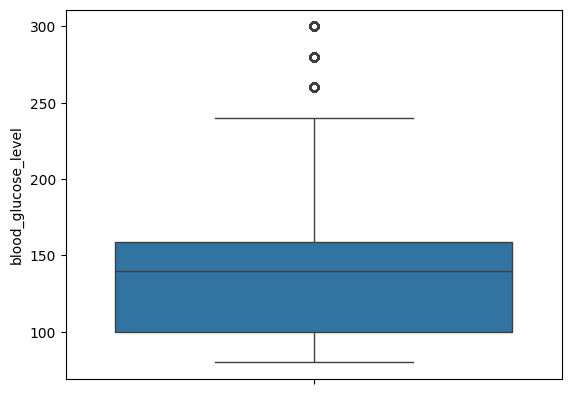

In [ ]:
sns.boxplot(di["blood_glucose_level"])
plt.show()

In [ ]:
di.loc[di['blood_glucose_level'] > upper_limit, 'blood_glucose_level'] = upper_limit
di.loc[di['blood_glucose_level'] < lower_limit, 'blood_glucose_level'] = lower_limit


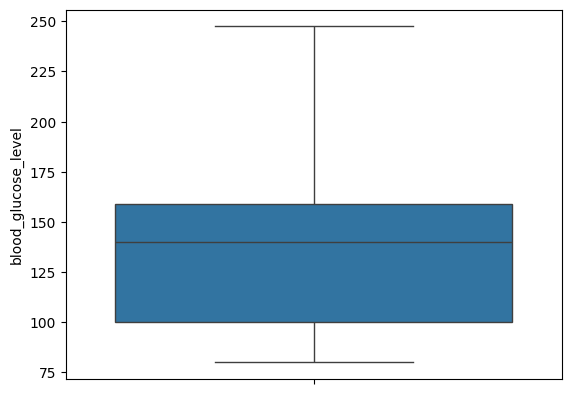

In [ ]:
sns.boxplot(di["blood_glucose_level"])
plt.show()

***PERCENTILE METHOD***

In [ ]:
UPP=df["blood_glucose_level"].quantile(0.99)
LOW=df["blood_glucose_level"].quantile(0.01)
print(UPP)
print(LOW)

280.0
80.0


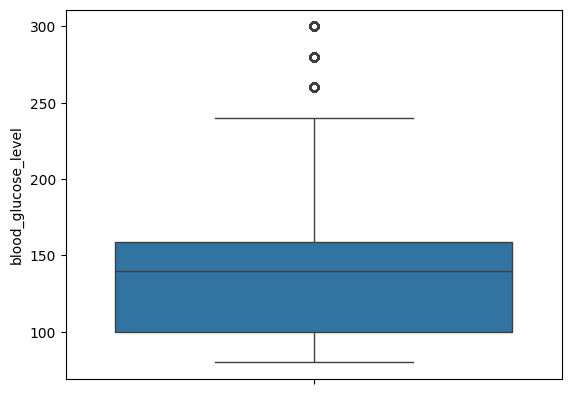

In [ ]:
sns.boxplot(di["blood_glucose_level"])
plt.show()

In [ ]:
di.loc[(di['blood_glucose_level'] <= UPP) & (di['blood_glucose_level'] >= LOW) ]
print(len(df)-len(di))

0


In [ ]:
di.loc[di["blood_glucose_level"]>UPP,"blood_glucose_level"]=UPP
di.loc[di["blood_glucose_level"]<LOW,"blood_glucose_level"]=LOW

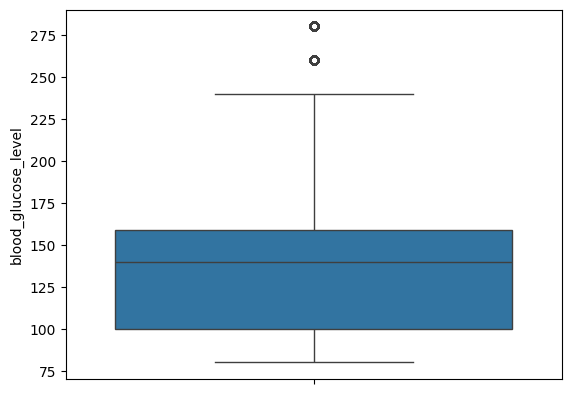

In [ ]:
sns.boxplot(di["blood_glucose_level"])
plt.show()

In [ ]:
class outlier:
  def __init__(self,di):
    # self.df=df
    self.di=df.select_dtypes(include=["int64","float64"])

  def zscore(self):
    upper_limit=self.di.mean()+3*self.di.std()
    lower_limit=self.di.mean()-3*self.di.std()
    # print(upper_limit)
    # print(lower_limit)
    return upper_limit,lower_limit

  # def iqr(self):
  #   q1=self.di.quantile(0.25)
  #   q3=self.di.quantile(0.75)
  #   iqr=q3-q1
  #   upper_limit=q3+1.5*iqr
  #   lower_limit=q1-1.5*iqr
  #   # print(upper_limit)
  #   # print(lower_limit)
  #   return upper_limit,lower_limit

  # def percentile(self):
  #   UPP=self.di.quantile(0.99)
  #   LOW=self.di.quantile(0.01)
  #   # print(UPP)
  #   # print(LOW)
  #   return UPP,LOW

  # def capping(self):
  #   upper_limit=self.di.quantile(0.99)
  #   lower_limit=self.di.quantile(0.01)
  #   # print(upper_limit)
  #   # print(lower_limit)
  #   return upper_limit,lower_limit




In [ ]:
nm=outlier(df)
nm.zscore()
# print()
# nm.iqr()
# nm.percentile()
# nm.capping()

(age                    109.436376
 hypertension             0.864301
 heart_disease            0.623199
 bmi                     47.231117
 HbA1c_level              8.739523
 blood_glucose_level    255.472916
 diabetes                 0.921649
 dtype: float64,
 age                   -25.664664
 hypertension           -0.714601
 heart_disease          -0.544359
 bmi                     7.410417
 HbA1c_level             2.315491
 blood_glucose_level    19.817524
 diabetes               -0.751649
 dtype: float64)

In [ ]:
nm.percentile()

(age                     80.000000
 hypertension             1.000000
 heart_disease            1.000000
 bmi                     48.790100
 HbA1c_level              8.800000
 blood_glucose_level    260.182468
 diabetes                 1.000000
 Name: 0.99, dtype: float64,
 age                     1.08
 hypertension            0.00
 heart_disease           0.00
 bmi                    14.60
 HbA1c_level             3.50
 blood_glucose_level    80.00
 diabetes                0.00
 Name: 0.01, dtype: float64)

In [ ]:
import pandas as pd

class Outlier:
    def __init__(self, df):
        self.df = df.select_dtypes(include=["int64", "float64"])

    def zscore(self):
        upper_limit = self.df.mean() + 3 * self.df.std()
        lower_limit = self.df.mean() - 3 * self.df.std()
        outliers = self.df[(self.df > upper_limit) | (self.df < lower_limit)]
        return outliers

    def iqr(self):
        q1 = self.df.quantile(0.25)
        q3 = self.df.quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        outliers = self.df[(self.df > upper_limit) | (self.df < lower_limit)]
        return outliers

    def percentile(self):
        upper_percentile = self.df.quantile(0.99)
        lower_percentile = self.df.quantile(0.01)
        outliers = self.df[(self.df > upper_percentile) | (self.df < lower_percentile)]
        return outliers

    def capping(self):
        upper_limit = self.df.quantile(0.99)
        lower_limit = self.df.quantile(0.01)
        self.df[self.df > upper_limit] = upper_limit
        self.df[self.df < lower_limit] = lower_limit
        return self.df


# Example usage:
# data = {
#     'A': [10, 12, 15, 20, 22, 25, 30, 35, 200],
#     'B': [2, 4, 6, 8, 10, 12, 14, 16, 18]
# }

df = pd.DataFrame(di)

outlier_detector = Outlier(df)

# Using z-score method
outliers_z = outlier_detector.zscore()
print("Z-Score Method Outliers:")
print(outliers_z)
print()

# Using IQR method
outliers_iqr = outlier_detector.iqr()
print("IQR Method Outliers:")
print(outliers_iqr)
print()

# Using percentile method
outliers_percentile = outlier_detector.percentile()
print("Percentile Method Outliers:")
print(outliers_percentile)
print()

# Using capping method
capped_df = outlier_detector.capping()
print("Capped DataFrame:")
print(capped_df)


Z-Score Method Outliers:
       age  hypertension  heart_disease  bmi  HbA1c_level  \
0      NaN           NaN            1.0  NaN          NaN   
1      NaN           NaN            NaN  NaN          NaN   
2      NaN           NaN            NaN  NaN          NaN   
3      NaN           NaN            NaN  NaN          NaN   
4      NaN           1.0            1.0  NaN          NaN   
...    ...           ...            ...  ...          ...   
99995  NaN           NaN            NaN  NaN          NaN   
99996  NaN           NaN            NaN  NaN          NaN   
99997  NaN           NaN            NaN  NaN          NaN   
99998  NaN           NaN            NaN  NaN          NaN   
99999  NaN           NaN            NaN  NaN          NaN   

       blood_glucose_level  diabetes  
0                      NaN       NaN  
1                      NaN       NaN  
2                      NaN       NaN  
3                      NaN       NaN  
4                      NaN       NaN  
...     

ValueError: Must specify axis=0 or 1

In [ ]:
df.shape

(100000, 9)

In [ ]:
x=df.drop("diabetes",axis=1)
y=df["diabetes"]
x
y.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [ ]:
x.shape,y.shape

((100000, 8), (100000,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [ ]:
x_train.shape,y_train.shape

((80000, 8), (80000,))

In [ ]:
y_train.value_counts()

diabetes
0    73178
1     6822
Name: count, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

NameError: name 'y_test' is not defined

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
dinesh=np.array([[1,31,0,0,4,20.6,8.5,100]])

di_pred=model.predict(dinesh)
di_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [ ]:
mode=AdaBoostClassifier().fit(x_train,y_train)
y_pred=mode.predict(x_test)
accuacy=accuracy_score(y_test,y_pred)
accuacy

0.9725

In [ ]:
model=RandomForestClassifier().fit(x_train,y_train)
y_predict=model.predict(x_test)
accuacy=accuracy_score(y_test,y_predict)
accuacy

0.9704

In [ ]:
accuacy=accuracy_score(y_test,y_pred)
accuacy

0.95125

In [ ]:
confusion_matrix(y_test,y_pred)

array([[17755,   541],
       [  434,  1270]])

In [ ]:
class Diabetes:
  def __init__(self,x_test,y_test,y_train,x_train):
    self.x_test=x_test
    self.y_test=y_test
    self.y_train=y_train
    self.x_train=y_train

  def decisiontree(self):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Decision Tree Classifier accuracy score: ',accuracy)
    return accuracy

  def RandomForestClassifier(self):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def Logistic(self):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def SupertVector(self):
    from sklearn import svm
    model = svm.SVC().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Support vector machines accuracy score: ',accuracy)
    return accuracy

  def KNeighborsClassifier(self):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('KNeighbors Classifier accuracy score: ',accuracy)
    return accuracy

  def GaussianNaiveBayes(self):
    from sklearn.naive_bayes import GaussianNB
    model=GaussianNB().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Naive Bayes Classifier accuracy score: ",accuracy)
    return accuracy

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy  = accuracy_score(y_test,y_pred)
    print("Gradient Boosting Classifier accuracy score: ",accuracy)
    return accuracy

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("AdaBoost Classifier accuracy score: ",accuracy)
    return accuracy

  def SGDClassifier(self):
    from sklearn.linear_model import SGDClassifier
    model = SGDClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("SGD Classifier accuracy score: ",accuracy)
    return accuracy

  def MLPClassifier(self):
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Neural network models accuracy score: ",accuracy)
    return accuracy

  def NearestCentroid(self):
    from sklearn.neighbors import NearestCentroid
    model = NearestCentroid().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Nearest Neighbors accuracy score: ",accuracy)
    return accuracy

  def LGBMClassifier(self):
    from lightgbm import LGBMClassifier
    model = LGBMClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("LGBM Classifier accuracy score: ",(accuracy*100))
    return accuracy

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
diabetes=Diabetes(x_test,y_test,y_train,x_train)
diabetes.decisiontree()
diabetes.RandomForestClassifier()
diabetes.Logistic()
diabetes.SupertVector()
diabetes.KNeighborsClassifier()
diabetes.GaussianNaiveBayes()
diabetes.GradientBoosting()
diabetes.AdaBoost()
diabetes.SGDClassifier()
diabetes.MLPClassifier()
diabetes.NearestCentroid()

Decision Tree Classifier accuracy score:  0.94895
Random Forest Classifier accuracy score:  0.96895


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier accuracy score:  0.95045
Support vector machines accuracy score:  0.94595
KNeighbors Classifier accuracy score:  0.9509
Naive Bayes Classifier accuracy score:  0.90365
Gradient Boosting Classifier accuracy score:  0.97055
AdaBoost Classifier accuracy score:  0.97005
SGD Classifier accuracy score:  0.95725
Neural network models accuracy score:  0.9564
Nearest Neighbors accuracy score:  0.8548


0.8548

In [ ]:
diabetes.LGBMClassifier()

[LightGBM] [Info] Number of positive: 6803, number of negative: 73197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085038 -> initscore=-2.375791
[LightGBM] [Info] Start training from score -2.375791
LGBM Classifier accuracy score:  0.97045


0.97045

In [ ]:
df1=pd.read_csv("/content/Wine_Quality_Data.csv")
df1

FileNotFoundError: [Errno 2] No such file or directory: '/content/Wine_Quality_Data.csv'

In [ ]:
encode=OrdinalEncoder()
df1.color=encode.fit_transform(df1[["color"]])

In [ ]:
x=df1.drop("color",axis=1)
y=df1["color"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [ ]:
model=DecisionTreeClassifier().fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0., 1., 1., ..., 1., 0., 1.])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[299  13]
 [  8 980]]
